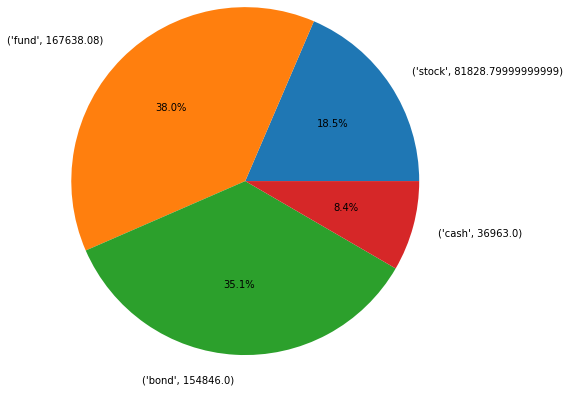

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

# read initial Excel table
def read_table ( file ):
    t = pd.read_excel( file )
    return t

file_name = "Tinkoff.xls"
t = read_table(file_name)

total_sum = t["Value"].sum()   # all money

def sum_in_attribute( ds, attr ):
    """Returns dictionary "Attribute: sum of Values"
       Params:
         ds - pandas.DataFrame
         attr - string of name of attribute (column in ds)
    """
    
    uniq_val = ds[attr].unique()  # unique values in attribute
    attr_sum = {}                 # dictionary of total sums for each value of attribute
    
    for v in uniq_val:
        sum_v = ds [ ds[attr]==v ] ["Value"].sum()   #  sum of all "Values" for each attribute
        attr_sum[v] = sum_v                          # fill the dictionary Attribute: Value-sum
        #print ( '{}: {} RUB'. format(v, str(sum_v)) )
    
    return attr_sum

types_sum = sum_in_attribute (t, "Type")
#types_sum = sum_in_attribute (t, "Monetary unit")

plt.pie( x       = types_sum.values() , 
         #labels  = types_sum.keys()   , 
         labels  =  list(  zip(types_sum.keys(), types_sum.values())    )  , 
         autopct = '%1.1f%%',
         shadow  = False   ,
         labeldistance=1.15 ,
         radius=2)
plt.savefig("pie-diagram.jpg")
plt.show()

Type
fund     167638.08
bond     154846.00
stock     81828.80
cash      36963.00
Name: Value, dtype: float64


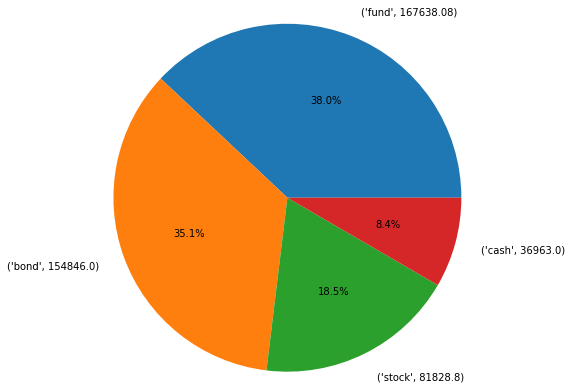

In [2]:
# Or much easier using internal methods "df.groupby"

out = t.groupby(["Type"])["Value"].sum()

out = out.sort_values(ascending = False)
print (out)

keys = out.index
vals = out.values

plt.pie( x       = vals , 
         labels  =  list(  zip(keys, vals)    )  , 
         autopct = '%1.1f%%',
         shadow  = False   ,
         labeldistance=1.15 ,
         radius=2)
plt.savefig("pie-diagram.jpg")
plt.show()

In [3]:
t.groupby(["Type", "Monetary unit"]) ["Value"].sum()

Type   Monetary unit
bond   rub              154846.00
cash   euro                 77.00
       rub               36320.00
       usd                 566.00
fund   euro               3204.90
       rub              145003.00
       usd               19430.18
stock  euro               2772.00
       rub               65537.00
       usd               13519.80
Name: Value, dtype: float64

In [4]:
t.groupby(["Type", "Monetary unit"]) [["Value"]].sum()

Value
Type  Monetary unit           
bond  rub            154846.00
cash  euro               77.00
      rub             36320.00
      usd               566.00
fund  euro             3204.90
      rub            145003.00
      usd             19430.18
stock euro             2772.00
      rub             65537.00
      usd             13519.80

In [8]:
# aggregate by properties
t.groupby(["Type"]) .agg({"Value": [sum, min, max], 
                          "Monetary unit": 'first' })

Value                Monetary unit
             sum   min      max         first
Type                                         
bond   154846.00   0.0  10364.0           rub
cash    36963.00  77.0  36320.0           rub
fund   167638.08  75.0  39708.0           rub
stock   81828.80   0.0   9555.0           usd

In [10]:

tt = t.groupby(["Type"]) ["Monetary unit"]
tt.describe()

,count,unique,top,freq
Type,,,,
bond,27,1,rub,27
cash,3,3,rub,1
fund,21,3,rub,16
stock,26,3,rub,23
